In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#read in pollen image
img = cv2.imread("pollen.jpg")

In [3]:
#create colourspaces
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
#graph hist of HSV values
h, s, v = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]
hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v],[0],None,[256],[0,256])

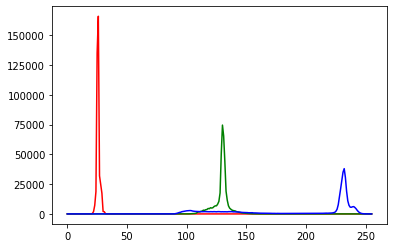

In [5]:
#median value of 127
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")

In [6]:
#create threshhold for mask
image_edges, thresh = cv2.threshold(hsv, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
Gmask = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
mask2 = cv2.bitwise_and(img,img, mask= Gmask)

In [7]:
#Find contours 
contours,H = cv2.findContours(Gmask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#sort contours by size , with a reverse index i.e biggest contour first  
cnt = sorted(contours, key=cv2.contourArea,reverse=True)

In [8]:
#print total number of contours
print(str(len(contours)))

#cell contour is the second element in cnt array i.e the third biggest
area = cv2.contourArea(cnt[1])
cellCnt = cnt[1]

#create white canvas for visualization
canvas = np.zeros(img.shape,np.uint8)
canvas.fill(255)

535


In [9]:
#draw cell contour
draw = cv2.drawContours(canvas,cellCnt,-1,(0,255,0),3)

In [10]:
#create bounding rectangle points using minAreaRect
x, y, w, h = cv2.boundingRect(cellCnt)
rect = cv2.minAreaRect(cellCnt)
#create points from minAreaRect
box = cv2.boxPoints(rect)
#box2 = cv2.boxPoints(cellCnt)
#create integer values from floating point numbers
box = np.int0(box)
#create points from box object for trigomoetry
x2,y2,w2,h2 = box
print(x,y,w,h)
#print(x2,y2,w2,h2)

140 108 533 299


In [11]:
#draw recangles on canvas
cv2.rectangle(canvas,(x,y),(x+w,y+h),(255,0,0),3)
cv2.drawContours(canvas,[box],0,(0,0,255),3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

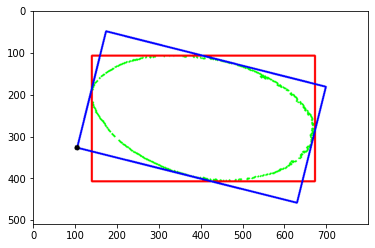

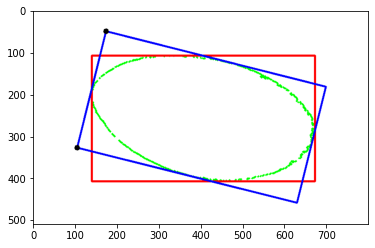

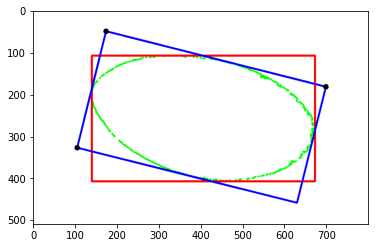

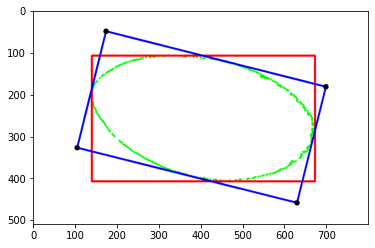

In [12]:
#visualize points for computation
for i in box:
    cv2.circle(canvas,(i[0],i[1]), 3, (0,0,0), 5)
    imgplot = plt.imshow(canvas)
    plt.show()

In [13]:
#Draw lines for computing the legnth of the line in pixels
cv2.line(canvas,(box[0]),(box[1]),(0,0,0),5)
cv2.line(canvas,(box[0]),(box[3]),(0,0,0),5)

#Find the height and width of the cell using points in box array and convert floatinf point numbers to interger values
height=np.int0(cv2.norm(box[0],box[1]))
width=np.int0(cv2.norm(box[0],box[3]))

#calculate microns by using the follwing formulea
wMicron = height * 25 / 1000
hMicron = width * 25 / 1000

print(height,hMicron,width,wMicron)

285 13.525 541 7.125


In [14]:
#co ordinates of lines
pointx = 675 
point1x , point1y = box[1]
point2x, point2y = box[2]

In [15]:
#compute angle using arctan2 with co ordinates of lines
angle = np.arctan2(point2x - pointx, point2y - y)
angle

0.31362065221669827

In [16]:
#the result string 
result = "Width: " + str(wMicron) + " microns," + " Height: " + str(hMicron) + " microns" 
#multiply by 100 to give interger value 
result2 = str(np.int0(angle*100)) + "degrees"

In [17]:
#draw results string on canvas and original image
cv2.putText(canvas,result,box[0],cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2,cv2.LINE_AA)
cv2.putText(img,result,box[0],cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2,cv2.LINE_AA)
cv2.putText(canvas,result2,box[1],cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2,cv2.LINE_AA)
cv2.putText(img,result2,box[1],cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2,cv2.LINE_AA)

array([[[111, 215, 228],
        [112, 216, 229],
        [114, 218, 231],
        ...,
        [113, 216, 231],
        [115, 218, 233],
        [115, 218, 233]],

       [[112, 216, 229],
        [113, 217, 230],
        [114, 218, 231],
        ...,
        [114, 217, 232],
        [114, 217, 232],
        [113, 216, 231]],

       [[113, 217, 230],
        [113, 217, 230],
        [113, 217, 230],
        ...,
        [114, 217, 232],
        [113, 216, 231],
        [112, 215, 230]],

       ...,

       [[116, 219, 234],
        [116, 219, 234],
        [115, 218, 233],
        ...,
        [114, 212, 228],
        [113, 211, 227],
        [112, 210, 226]],

       [[116, 219, 234],
        [116, 219, 234],
        [115, 218, 233],
        ...,
        [115, 213, 229],
        [114, 212, 228],
        [114, 212, 228]],

       [[117, 220, 235],
        [116, 219, 234],
        [116, 219, 234],
        ...,
        [116, 214, 230],
        [116, 214, 230],
        [115, 213, 229]]

In [18]:
#draw lines for vizualization
cv2.line(canvas,(x,y),(675,y),(0,0,0),5)
cv2.line(canvas,(box[1]),(box[2]),(0,0,0),5)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [19]:
cv2.imshow('canvas',canvas)
cv2.imshow('image',img)
cv2.imwrite('result2.jpg',img)

cv2.waitKey(0)
cv2.destroyAllWindows()